In [1]:
import os
import random 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from img_generator import build_train_test_df, DataGenerator2D

In [3]:
data_path_source_dir = os.path.join('ml4h_proj1_colon_cancer_ct', 'ml4h_proj1_colon_cancer_ct')

# Let's check the imbalance in the data

In [4]:
random.seed(123)
np.random.seed(123)

Let's choose a set of images that have cancer labeled in them 

In [5]:
tr_df, x_ts_df = build_train_test_df(data_path_source_dir)

In [6]:
cancer_pixels_df = pd.read_pickle('cancer_pixels_df')
cancer_pixels_df.reset_index(inplace=True)

In [7]:
cancer_pixels_df['index'] = cancer_pixels_df.image_name.map(lambda str_: str_.split('.nii.gz')[0].split('colon_')[1])

In [8]:
tr_df_only_cancer = cancer_pixels_df.set_index(['index', 'depth_i'])[['cancer_pixel_area']].join(tr_df, how='inner')

In [9]:
tr_df_only_cancer

cancer_pixel_area  \
index depth_i                      
001   51                   841.0   
      52                   646.0   
      53                   296.0   
005   44                   278.0   
      50                   270.0   
...                          ...   
169   139                  245.0   
      140                  228.0   
      141                  198.0   
      142                  153.0   
      143                  131.0   

                                                   x_tr_img_path  depth  \
index depth_i                                                             
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     60   
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...     98   
...                                                          ...    ...   
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...    258   

                                                   y_tr_img_path  
index depth_i                                                     
001   51       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      52       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      53       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
005   44       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      50       ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
...                                                          ...  
169   139      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      140      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      141      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      142      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  
      143      ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_ca...  

[1034 rows x 4 columns]

## Distribution of images that have cancer pixels

In [18]:
a = tr_df.join(tr_df_only_cancer.groupby(level=0)['cancer_pixel_area'].count().rename('cancer_cut_counts'))

<AxesSubplot:ylabel='Frequency'>

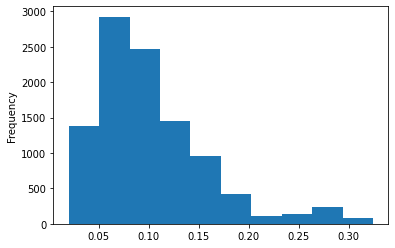

In [22]:
(a['cancer_cut_counts']/a['depth']).plot.hist()

In [24]:
(a['cancer_cut_counts']/a['depth']).mean()

0.10175162369612281

In [25]:
(a['cancer_cut_counts']/a['depth']).median()

0.08888888888888889

In [38]:
(a['cancer_cut_counts']/a['depth']).quantile([0.25, 0.5, 0.75, 0.95, 0.99])

0.25    0.063415
0.50    0.088889
0.75    0.129032
0.95    0.215686
0.99    0.283019
dtype: float64

A very very big portion of them have cancer pixels in only 20% of the transversal cuts. Let's check pixel percentage wise over all the image but it's not looking too promising  

## Relative frequency of cancer pixels 

In [29]:
import nibabel as nib

In [39]:
percentage_cancer_pixels = list()
for img_path in tr_df.y_tr_img_path.unique():
    print(img_path)
    img_i = nib.load(img_path).get_data()
    percentage_cancer_pixels.append(img_i.sum()/(img_i.shape[0]*img_i.shape[1]*img_i.shape[2]))

ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_001.nii.gz


c:\users\juan diego\documents\ondemna\venv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_005.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_006.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_007.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_008.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_009.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_011.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_012.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_015.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_022.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_024.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_025.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_colon_cancer_ct\labelsTr\colon_026.nii.gz
ml4h_proj1_colon_cancer_ct\ml4h_proj1_co

In [40]:
percentage_cancer_pixels

[0.00011336008707682291,
 0.0005921344367825255,
 6.698159610523897e-05,
 0.00023712983002533783,
 0.00022386384490352348,
 0.0007468753390842014,
 0.00016996595594618056,
 0.0006678754633123225,
 0.0003219180636935764,
 0.0005919305901778372,
 0.0006840896606445313,
 6.173670977011495e-05,
 0.0003108047857517149,
 0.0024584720009251646,
 0.0001800938656455592,
 0.002227351350604363,
 0.0017173971448625838,
 0.00020580291748046876,
 0.0001087188720703125,
 0.0011880141038161057,
 0.00014401465347132732,
 0.000341834091558689,
 0.0025931171987248563,
 0.0003040313720703125,
 0.00025573143592247594,
 0.00021459406072443183,
 0.0002996872882453763,
 0.00018546251746697154,
 0.003140194315305898,
 0.0007075889437806373,
 0.00021557216226619525,
 2.657465574120273e-05,
 0.0005439411510120739,
 0.0002564822926240809,
 0.0006077740643475507,
 0.00019236361042837078,
 0.0006561279296875,
 0.0013643781715464369,
 0.00090362548828125,
 0.00019073486328125,
 9.665378304414971e-05,
 0.000759391784

In [42]:
np.mean(percentage_cancer_pixels)

0.0005996856643402784

In [48]:
np.median(percentage_cancer_pixels)

0.0003324432956836031

In [50]:
np.max(percentage_cancer_pixels)

0.005706864173966225

In [49]:
np.quantile(percentage_cancer_pixels, [0.25, 0.5, 0.75, 0.95, 0.99])

array([0.00017933, 0.00033244, 0.00073229, 0.00206513, 0.00316586])

<AxesSubplot:ylabel='Frequency'>

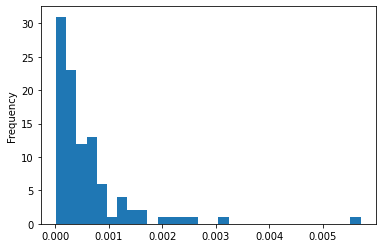

In [47]:
pd.Series(percentage_cancer_pixels).plot.hist(bins=30)

The class unbalance is dramatic, they are all under 0.5%. 99% of them are at an unbalance of 0.3%, and 75% under 0.07& percent. We definetely need weights or up/down sampling of some sort. 